In [1]:
!pip install google-cloud-aiplatform

In [2]:
import vertexai
vertexai.init()

In [3]:
from vertexai.language_models import TextEmbeddingModel
embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")

In [4]:
embedding = embedding_model.get_embeddings(['life'])

In [5]:
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.006005102302879095, 0.015532972291111946, -0.030447669327259064, 0.05322219058871269, 0.014444807544350624, -0.0542873740196228, 0.045140113681554794, 0.02127358317375183, -0.06537645310163498, 0.019103270024061203]


In [6]:
embedding = embedding_model.get_embeddings(['What is the meaning of life?'])

In [7]:
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[0.020522113889455795, 0.02229207195341587, -0.009265718050301075, 0.005001612473279238, 0.016248879954218864, -0.018983161076903343, 0.04320966452360153, 0.02643178217113018, -0.04369377717375755, 0.023666976019740105]


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
emb_1 = embedding_model.get_embeddings(['What is the meaning of life?'])
emb_2 = embedding_model.get_embeddings(['How does one spend their time well on Earth?'])
emb_3 = embedding_model.get_embeddings(['Would you like a salad?'])

vec_1 = [emb_1[0].values]
vec_2 = [emb_2[0].values]
vec_3 = [emb_3[0].values]

In [10]:
print(cosine_similarity(vec_1,vec_2)) 
print(cosine_similarity(vec_2,vec_3))
print(cosine_similarity(vec_1,vec_3))

[[0.65503744]]
[[0.52001556]]
[[0.54139322]]


In [11]:
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"
in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"
in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!" 

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [12]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)

In [13]:
import numpy as np
embeddings_array = np.array(embeddings) 
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[ 0.04559246 -0.01472285 -0.02949955 ...  0.04057328 -0.03193641
  -0.01936668]
 [-0.01995482  0.00037652  0.0116593  ...  0.02617216 -0.03978169
  -0.02036468]
 [ 0.01030084  0.02219611  0.02433357 ...  0.03538613 -0.0273955
  -0.04193578]
 ...
 [-0.0263201  -0.01767797 -0.01261324 ... -0.01372547  0.00060259
   0.01581882]
 [-0.00561961 -0.02237099 -0.03271009 ... -0.02777804 -0.03388645
  -0.01553735]
 [ 0.00867064 -0.0131854   0.04283332 ... -0.04224638  0.01800203
   0.01088098]]


In [14]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [15]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.40980753 -0.10084478]
 [-0.39561909 -0.18401444]
 [-0.29958523  0.07514691]
 [ 0.16077688  0.32879395]
 [ 0.1893873   0.48556638]
 [ 0.31516547 -0.23624716]
 [ 0.4396822  -0.36840086]]


In [16]:
!pip install ipympl plot-utils matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 67.3 MB/s eta 0:00:00:00:010:01


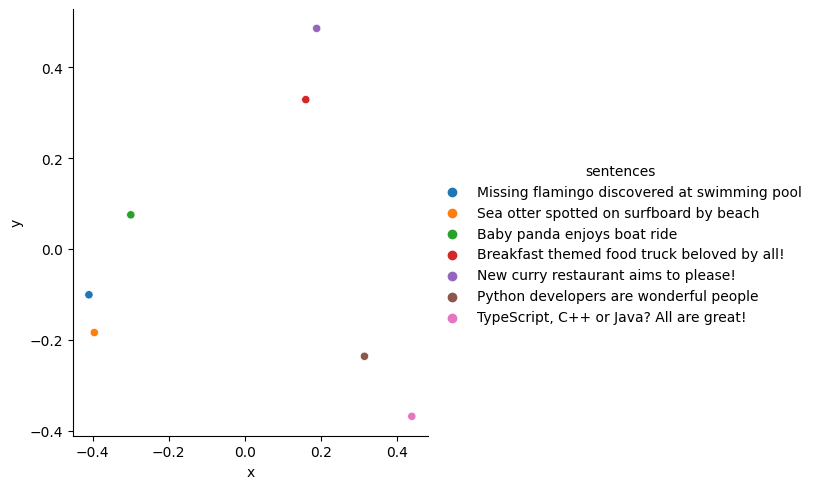

In [17]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({ 'x':new_values[:,0], 'y':new_values[:,1], 'sentences': input_text_lst_news})

# Create a visualization
sns.relplot(
    data,
    x='x',
    y='y',
    kind='scatter',
    hue='sentences'
)